In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

THIS ONLY CLEANS (flips and isolates via mask) THE HILLSLOPE...complete/compile for aspect/slope too!

In [3]:
#load lidar (needed to mask terrain layers)
fname = '~/Documents/research/sierra/data/compiled_SUPERsnow.nc' #BSU
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000}); ds.close()

#load terrain layers
path = '/Users/meganmason491/Documents/research/sierra/data/terrain/*.nc' #BSU
fpath = glob.glob(path)
terrain=xr.open_mfdataset(fpath, 
                          concat_dim=None, 
                          combine='nested', 
                          chunks={'x':1000, 'y':1000}, 
                          parallel=True).rename({'Band1':'hillshade'}).drop('transverse_mercator') 
terrain.close()

terrain_hill=np.flip(terrain.hillshade,0) #terrain needs to be flipped!
terrain_hill=terrain_hill.where(ds.mask==1)
terrain_hill=terrain_hill.to_dataset()
terrain_hill.close()

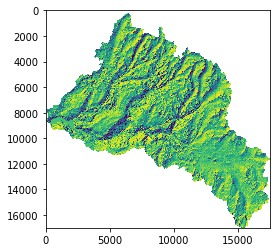

In [6]:
plt.imshow(terrain_hill.hillshade)

In [ ]:
terrain_hill.to_netcdf('/Users/meganmason491/Documents/research/sierra/data/terrain_hill.nc')